In [6]:
# import MH
from MH import Metropolis_Hastings, MetropolisHastings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import emcee

In [7]:
N = 100000

## 3D Rosenbrock function

In [8]:
# investgate 3D rosenbrock function
initial_point = np.array([1, 1, 1])
cov_matrix = np.array([[0.1, 0.08, 0.08], [0.08, 0.1, 0.08], [0.08, 0.08, 0.1]])

In [9]:
sampler = MetropolisHastings(N = N, ndim = 3, initial_point = initial_point, cov_matrix = cov_matrix, thinning_factor = 5)
sampler.sample()
chain = sampler.get_chain()
sampler.summary()

The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 2000;
tau: [3833.46949195]


Summary for Metropolis Hastings (Zachary)
---------
Number of Generations:  100000
Dimension:  3
Acceptance Rate:  0.07273658189265514
Integrated Autocorrelation Time:  [3833.46949195]
Effective Sample Size:  [26.08602996]


In [19]:
num_of_trials = 10
iat_list = []
iat_uncertainty = []
for thinning_factor in range (1,6):
    iat = []
    for trial in range (0, num_of_trials):
        sampler = MetropolisHastings(N = N, ndim = 3, initial_point = initial_point, cov_matrix = cov_matrix, thinning_factor = thinning_factor)
        sampler.sample()
        iat.append(sampler.get_IAT())
    iat_list.append(np.sum(iat))
    iat_uncertainty.append(np.std(iat))
print (iat_list)

The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 2000;
tau: [3762.47193824]
The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 2000;
tau: [5229.69657054]
The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 2000;
tau: [2525.89831489]
The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 2000;
tau: [3760.911497]
The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 2000;
tau: [3959.10912656]
The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this es

[29995.505083237204, 20034.774398701462, 10710.400428535197, 10578.123476277211, 14759.362648249302]


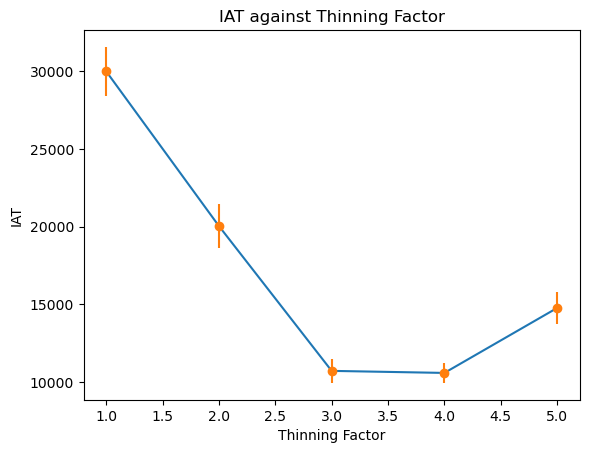

In [20]:
# plot the iat against thinning factor
plt.plot(range(1,6), iat_list)
# add the error bar
plt.errorbar(range(1,6), iat_list, yerr=iat_uncertainty, fmt='o')
plt.xlabel('Thinning Factor')
plt.ylabel('IAT')
plt.title('IAT against Thinning Factor')
plt.show()


In [12]:
print (len(chain))

100000


In [13]:
# create a dataframe from the chain
df = pd.DataFrame(chain, columns=['x1', 'x2', 'x3'])

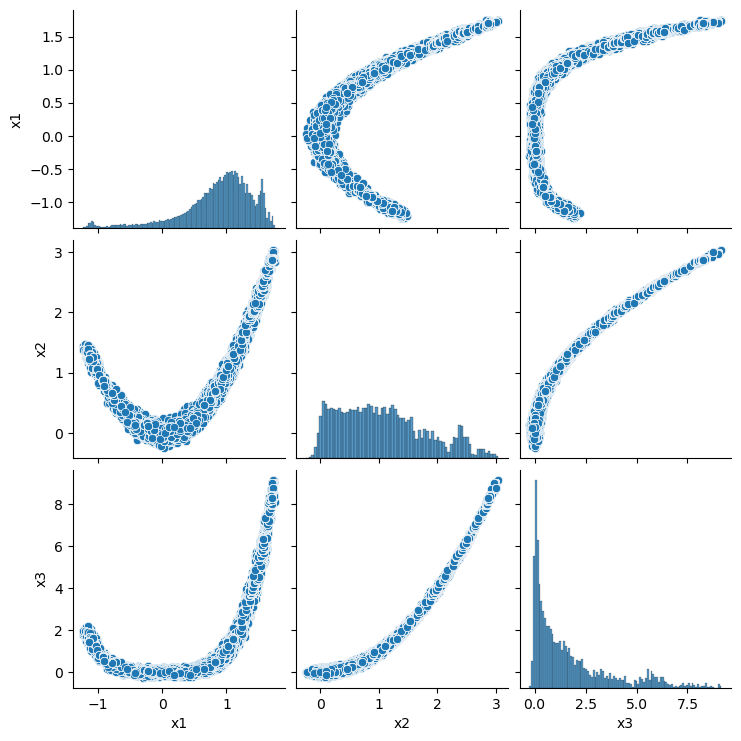

In [14]:
# plot the corner plot
sns.pairplot(df, markers='o')
plt.show()

## 4D Rosenbrock function

In [15]:
# investigate the 4D rosenbrock function
initial_point_4D = np.array([1, 1, 1, 1])
cov_matrix_4D = np.array([[0.1, 0.08, 0.08, 0.08], [0.08, 0.1, 0.08, 0.08], [0.08, 0.08, 0.1, 0.08], [0.08, 0.08, 0.08, 0.1]])


In [16]:
sampler = MetropolisHastings(N = N, ndim = 4, initial_point = initial_point_4D, cov_matrix = cov_matrix_4D)
sampler.sample()
chain_4D = sampler.get_chain()
sampler.summary()

The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 2000;
tau: [4441.02956706]


Summary for Metropolis Hastings (Zachary)
---------
Number of Generations:  100000
Dimension:  4
Acceptance Rate:  0.03778
Integrated Autocorrelation Time:  [4441.02956706]
Effective Sample Size:  [22.51730111]


In [17]:
# create a dataframe from the chain
df_4D = pd.DataFrame(chain_4D, columns=['x1', 'x2', 'x3', 'x4'])

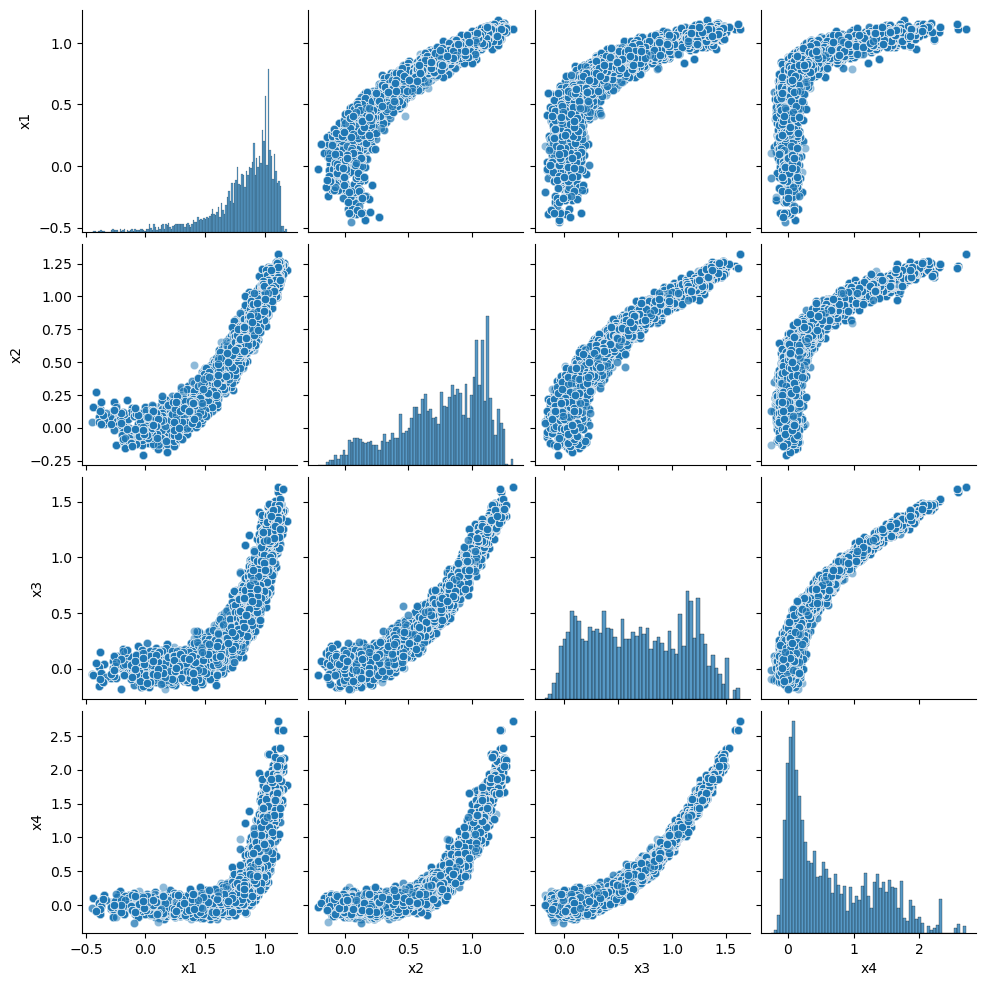

In [18]:
# plot the corner plot
sns.pairplot(df_4D, plot_kws={'alpha': 0.5, 'marker': 'o'})
plt.show()

In [ ]:
# Tensorflow Hamiltonian
# nested from nesci